# Heat Integration Examples

## Upgrade the Package `chbe444umd`
+ Upgrading will enable you to access its latest capabilities.
+ To install, run:
  >`%pip install chbe444umd`
+ To upgrade, run:
  >`%pip install --upgrade chbe444umd`
+ Restart the kernel after installing or upgrading.

## 1. HEN Example from H.01 to H.04, $ΔT_{min} = 20$ °C  

### 1.1 Specify streams

In [1]:
import chbe444umd as des

H1 = des.Stream(name='H1', kind='hot', T_source=180, T_target=60, H=360)
H2 = des.Stream(name='H2', kind='hot', T_source=150, T_target=30, H=120)
C1 = des.Stream(name='C1', kind='cold', T_source=20, T_target=135, H=230)
C2 = des.Stream(name='C2', kind='cold', T_source=80, T_target=140, H=270)

### 1.2 Perform pinch analysis

Stream data:
  Name  Type  T_source (°C)  T_target (°C)  H (kW)  C (kW/°C)
0   H1   hot            180             60     360        3.0
1   H2   hot            150             30     120        1.0
2   C1  cold             20            135     230        2.0
3   C2  cold             80            140     270        4.5

Design specs:
	ΔTmin = 20 °C



,T_upper,T_lower,H1,H2,C1,C2,ΔT,ΔC,ΔH,Residual ΔH,Adjusted ΔH
,°C,°C,kW/°C,kW/°C,kW/°C,kW/°C,°C,kW/°C,kW,kW,kW
-,,160,,,,,,,,0.0,90.0
160 °C to 140 °C,160,140,3.0,,,,20,3.0,60.0,60.0,150.0
140 °C to 135 °C,140,135,3.0,,,-4.5,5,-1.5,-7.5,52.5,142.5
135 °C to 130 °C,135,130,3.0,,-2.0,-4.5,5,-3.5,-17.5,35.0,125.0
130 °C to 80 °C,130,80,3.0,1.0,-2.0,-4.5,50,-2.5,-125.0,-90.0,0.0
80 °C to 40 °C,80,40,3.0,1.0,-2.0,,40,2.0,80.0,-10.0,80.0
40 °C to 20 °C,40,20,,1.0,-2.0,,20,-1.0,-20.0,-30.0,60.0
20 °C to 10 °C,20,10,,1.0,,,10,1.0,10.0,-20.0,70.0


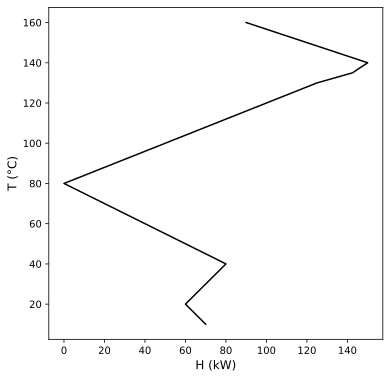

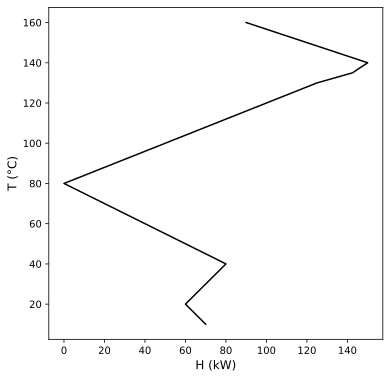

In [2]:
%config InlineBackend.figure_format='svg'
%matplotlib inline

TI, fig, ax = des.perform_pinch_analysis([H1, H2, C1, C2], DT_min=20,
                                         disp=True, GCC=True)
display(TI)
fig

### 1.3 Perform heat integration

In [3]:
des.synheat([H1, H2, C1, C2], n_stages=6, DT_min=20, decimals=1)

Temperature of hot stream i as it enters stage k:
i k  level
1 1  180.0
1 2  100.0
1 3  100.0
1 4  100.0
1 5  100.0
1 6   60.0
2 1  150.0
2 2  150.0
2 3  150.0
2 4  100.0
2 5  100.0
2 6  100.0

Temperature of cold stream j as it leaves stage k:
j k  level
1 1  105.0
1 2  105.0
1 3  105.0
1 4   80.0
1 5   80.0
1 6   20.0
2 1  133.3
2 2   80.0
2 3   80.0
2 4   80.0
2 5   80.0
2 6   80.0

Energy exchanged between hot stream i and cold stream j in stage k:
i j k  level
1 1 1    0.0
2 1 1    0.0
2 2 1    0.0
1 2 1  240.0
2 1 2    0.0
1 2 2    0.0
2 2 2    0.0
1 1 2    0.0
1 2 3    0.0
1 1 3    0.0
2 1 3   50.0
2 2 3    0.0
1 1 4    0.0
2 1 4    0.0
2 2 4    0.0
1 2 4    0.0
1 1 5  120.0
1 2 5    0.0
2 2 5    0.0
2 1 5    0.0
1 2 6    0.0
1 1 6    0.0
2 1 6    0.0
2 2 6    0.0

Energy exchanged between hot stream i and the cold utility:
i  level
1    0.0
2   70.0

Energy exchanged between cold stream j and the hot utility:
j  level
1   60.0
2   30.0

Total energy exchanged by hot stream i:
i

## 2. HEN Example from H.01 to H.04, $ΔT_{min} = 10$ °C  

### 2.1 Specify streams

In [4]:
import chbe444umd as des

H1 = des.Stream(name='H1', kind='hot', T_source=180, T_target=40, H=280)
H2 = des.Stream(name='H2', kind='hot', T_source=150, T_target=40, H=440)
C1 = des.Stream(name='C1', kind='cold', T_source=60, T_target=180, H=360)
C2 = des.Stream(name='C2', kind='cold', T_source=30, T_target=140, H=286)

### 2.2 Perform pinch analysis

In [5]:
%config InlineBackend.figure_format='svg'
%matplotlib inline

des.perform_pinch_analysis([H1, H2, C1, C2], DT_min=20,
                                disp=False, GCC=False)

,T_upper,T_lower,H1,H2,C1,C2,ΔT,ΔC,ΔH,Residual ΔH,Adjusted ΔH
,°C,°C,kW/°C,kW/°C,kW/°C,kW/°C,°C,kW/°C,kW,kW,kW
-,,,,,,,,,,0.0,116.0
180 °C to 160 °C,180,160,,,-3.0,,20,-3.0,-60.0,-60.0,56.0
160 °C to 140 °C,160,140,2.0,,-3.0,,20,-1.0,-20.0,-80.0,36.0
140 °C to 130 °C,140,130,2.0,,-3.0,-2.6,10,-3.6,-36.0,-116.0,0.0
130 °C to 60 °C,130,60,2.0,4.0,-3.0,-2.6,70,0.4,28.0,-88.0,28.0
60 °C to 30 °C,60,30,2.0,4.0,,-2.6,30,3.4,102.0,14.0,130.0
30 °C to 20 °C,30,20,2.0,4.0,,,10,6.0,60.0,74.0,190.0


### 2.3 Perform heat integration

In [6]:
des.synheat([H1, H2, C1, C2], n_stages=5, DT_min=10, decimals=1)

Temperature of hot stream i as it enters stage k:
i k  level
1 1  180.0
1 2  150.0
1 3   40.0
1 4   40.0
1 5   40.0
2 1  150.0
2 2  150.0
2 3   73.5
2 4   73.5
2 5   73.5

Temperature of cold stream j as it leaves stage k:
j k  level
1 1  160.0
1 2  140.0
1 3   60.0
1 4   60.0
1 5   60.0
2 1  140.0
2 2  140.0
2 3   30.0
2 4   30.0
2 5   30.0

Energy exchanged between hot stream i and cold stream j in stage k:
i j k  level
1 1 1   60.0
1 2 1    0.0
2 1 1    0.0
2 2 1    0.0
1 1 2    0.0
1 2 2  220.0
2 1 2  240.0
2 2 2   66.0
1 1 3    0.0
2 2 3    0.0
1 2 3    0.0
2 1 3    0.0
1 1 4    0.0
1 2 4    0.0
2 2 4    0.0
2 1 4    0.0
1 2 5    0.0
1 1 5    0.0
2 1 5    0.0
2 2 5    0.0

Energy exchanged between hot stream i and the cold utility:
i  level
1    0.0
2  134.0

Energy exchanged between cold stream j and the hot utility:
j  level
1   60.0
2    0.0

Total energy exchanged by hot stream i:
i  level
1 -280.0
2 -440.0

Total energy exchanged by cold stream j:
j  level
1 -360.0
2 -286.0



## 3. HEN Example from Heat Integration Workshop, $ΔT_{min} = 10$ °C  

### 3.1 Specify streams

In [7]:
import chbe444umd as des

H1 = des.Stream(name='H1', kind='hot', T_source=400, T_target=100, H=300)
H2 = des.Stream(name='H2', kind='hot', T_source=300, T_target=100, H=800)
C1 = des.Stream(name='C1', kind='cold', T_source=80, T_target=230, H=450)
C2 = des.Stream(name='C2', kind='cold', T_source=180, T_target=380, H=400)

### 3.2 Perform pinch analysis

In [8]:
%config InlineBackend.figure_format='svg'
%matplotlib inline

des.perform_pinch_analysis([H1, H2, C1, C2], DT_min=20,
                                disp=False, GCC=False)

,T_upper,T_lower,H1,H2,C1,C2,ΔT,ΔC,ΔH,Residual ΔH,Adjusted ΔH
,°C,°C,kW/°C,kW/°C,kW/°C,kW/°C,°C,kW/°C,kW,kW,kW
-,,,,,,,,,,0.0,100.0
380 °C to 280 °C,380,280,1.0,,,-2.0,100,-1.0,-100.0,-100.0,0.0
280 °C to 230 °C,280,230,1.0,4.0,,-2.0,50,3.0,150.0,50.0,150.0
230 °C to 180 °C,230,180,1.0,4.0,-3.0,-2.0,50,0.0,0.0,50.0,150.0
180 °C to 80 °C,180,80,1.0,4.0,-3.0,,100,2.0,200.0,250.0,350.0


### 3.3 Perform heat integration

In [9]:
des.synheat([H1, H2, C1, C2], DT_min=10, n_stages=4, decimals=1)

Temperature of hot stream i as it enters stage k:
i k  level
1 1  400.0
1 2  300.0
1 3  300.0
1 4  300.0
2 1  300.0
2 2  300.0
2 3  245.0
2 4  132.5

Temperature of cold stream j as it leaves stage k:
j k  level
1 1  230.0
1 2  230.0
1 3  230.0
1 4   80.0
2 1  340.0
2 2  290.0
2 3  180.0
2 4  180.0

Energy exchanged between hot stream i and cold stream j in stage k:
i j k  level
1 1 1    0.0
1 2 1  100.0
2 1 1    0.0
2 2 1    0.0
1 1 2    0.0
1 2 2    0.0
2 1 2    0.0
2 2 2  220.0
1 1 3    0.0
1 2 3    0.0
2 1 3  450.0
2 2 3    0.0
1 1 4    0.0
1 2 4    0.0
2 1 4    0.0
2 2 4    0.0

Energy exchanged between hot stream i and the cold utility:
i  level
1  200.0
2  130.0

Energy exchanged between cold stream j and the hot utility:
j  level
1    0.0
2   80.0

Total energy exchanged by hot stream i:
i  level
1 -300.0
2 -800.0

Total energy exchanged by cold stream j:
j  level
1 -450.0
2 -400.0

Cost of heating: 8000.0
Cost of cooling: 33000.0
Investment cost: 36000.0
